In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

* Import du premier fichier item properties - REMPLACER PAR BON CHEMIN 

In [2]:
df_properties1 = pd.read_csv("/Volumes/HD 2/DataScientest/PROJET/Jeu de données/donnees_brutes/item_properties_part1.csv")
df_properties1.head()

,timestamp,itemid,property,value
0,1435460400000,460429,categoryid,1338
1,1441508400000,206783,888,1116713 960601 n277.200
2,1439089200000,395014,400,n552.000 639502 n720.000 424566
3,1431226800000,59481,790,n15360.000
4,1431831600000,156781,917,828513


* Import du second fichier item properties - REMPLACER PAR BON CHEMIN 

In [3]:
df_properties2 = pd.read_csv("/Volumes/HD 2/DataScientest/PROJET/Jeu de données/donnees_brutes/item_properties_part2.csv")
df_properties2.head()

,timestamp,itemid,property,value
0,1433041200000,183478,561,769062
1,1439694000000,132256,976,n26.400 1135780
2,1435460400000,420307,921,1149317 1257525
3,1431831600000,403324,917,1204143
4,1435460400000,230701,521,769062


* Concaténation des 2 fichiers item properties dans df_properties

In [4]:
df_properties = pd.concat([df_properties1, df_properties2])
df_properties.head()

,timestamp,itemid,property,value
0,1435460400000,460429,categoryid,1338
1,1441508400000,206783,888,1116713 960601 n277.200
2,1439089200000,395014,400,n552.000 639502 n720.000 424566
3,1431226800000,59481,790,n15360.000
4,1431831600000,156781,917,828513


* Import du  fichier des catégories - REMPLACER PAR BON CHEMIN

In [5]:
cat_tree = pd.read_csv("/Volumes/HD 2/DataScientest/PROJET/Jeu de données/donnees_brutes/category_tree.csv")
cat_tree.head()

,categoryid,parentid
0,1016,213.0
1,809,169.0
2,570,9.0
3,1691,885.0
4,536,1691.0


* Import du fichier des événements, jeu de données comportementales - REMPLACER PAR BON CHEMIN

In [6]:
df_events = pd.read_csv("/Volumes/HD 2/DataScientest/PROJET/Jeu de données/donnees_brutes/events.csv")
df_events.head()

,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
4,1433221337106,951259,view,367447,NaN


* df_events est le dataframe qui va le plus nous intéresser pour des calculs d'événements
* Conversion du timestamp en dates réelles dans df_events
* Changement de l'unix en date et creation d'une colonne jour de la semaine
* Les heures n'avaient pas de sens donc décalage de 5h pour match le -5 UTC americain 

* Nombre de lignes dupliquées (que dans df_events, aucune dans les autres dataframes)

In [7]:
df_events[df_events.duplicated()].shape

(460, 5)

_On constate 460 lignes dupliquées, on les supprime du dataframe df_events :_

In [8]:
df_events.drop_duplicates(inplace=True)

In [9]:
import datetime
import calendar

df_events['timestamp'] = pd.to_datetime(df_events['timestamp'], unit= "ms",) - datetime.timedelta(hours=5)
df_events['day_of_week'] = df_events.timestamp.dt.day_name()

df_events.head()

,timestamp,visitorid,event,itemid,transactionid,day_of_week
0,2015-06-02 00:02:12.117,257597,view,355908,NaN,Tuesday
1,2015-06-02 00:50:14.164,992329,view,248676,NaN,Tuesday
2,2015-06-02 00:13:19.827,111016,view,318965,NaN,Tuesday
3,2015-06-02 00:12:35.914,483717,view,253185,NaN,Tuesday
4,2015-06-02 00:02:17.106,951259,view,367447,NaN,Tuesday


* Mettre les jours de la semaine dans l'ordre et séparation des valeurs de la colonne event en 3 colonnes

In [10]:
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_events['day_of_week'] = pd.Categorical(df_events['day_of_week'], categories=cats, ordered=True)

df_events = df_events.join(pd.get_dummies(df_events.event, prefix = "events"))

df_events.head()

,timestamp,visitorid,event,itemid,transactionid,day_of_week,events_addtocart,events_transaction,events_view
0,2015-06-02 00:02:12.117,257597,view,355908,NaN,Tuesday,0,0,1
1,2015-06-02 00:50:14.164,992329,view,248676,NaN,Tuesday,0,0,1
2,2015-06-02 00:13:19.827,111016,view,318965,NaN,Tuesday,0,0,1
3,2015-06-02 00:12:35.914,483717,view,253185,NaN,Tuesday,0,0,1
4,2015-06-02 00:02:17.106,951259,view,367447,NaN,Tuesday,0,0,1


* Nous réalisons un graphique de corrélation des variables sur df_events pour visualiser la dépendance des variables entre-elles

<AxesSubplot:>

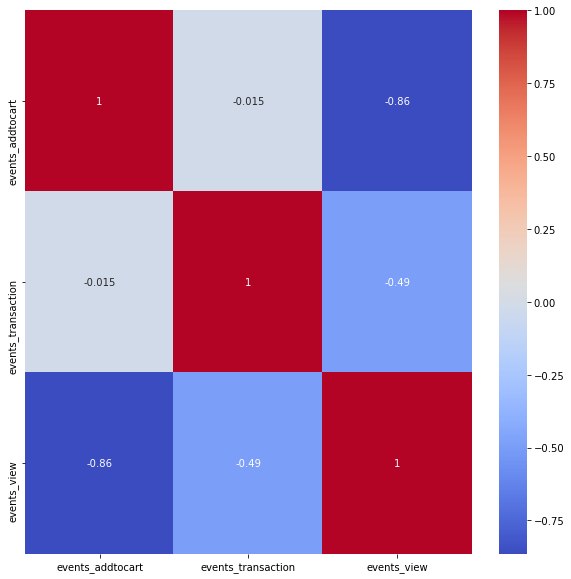

In [11]:
columns = ["events_addtocart", "events_transaction" , "events_view"]
df_select = pd.DataFrame(data=df_events,columns=columns)
cor = df_select.corr()
fig = plt.subplots(figsize=(10,10))
sns.heatmap(cor, annot= True, cmap="coolwarm")

_On observe une forte corrélation négative entre les différentes valeurs_

* On souhaite visualiser le nombre de transactions / jour de la semaine pour sortir une tendance jours de semaine _vs_ week-ends

Text(0.5, 1.0, 'Transactions by weekday')

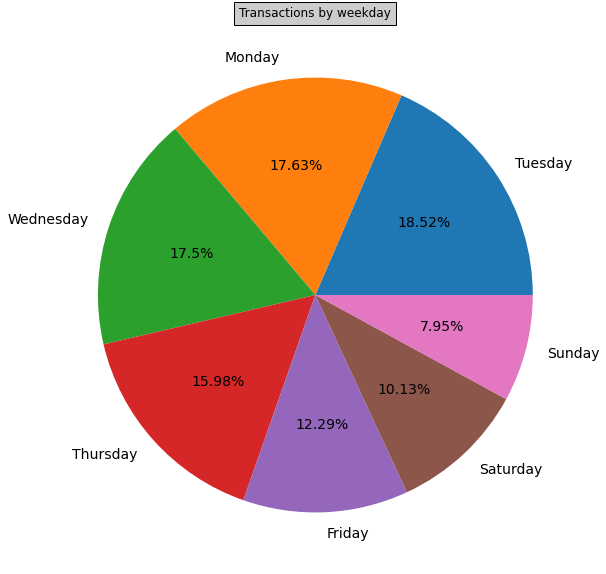

In [12]:
plt.figure(figsize = (10,10));

plt.pie(x = df_events.day_of_week[df_events.event == "transaction"].value_counts(normalize = True),
        labels = ["Tuesday", "Monday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
        autopct = lambda x: str(round(x, 2)) + '%', textprops={'fontsize': 14});
plt.title("Transactions by weekday", bbox={'facecolor':'0.8', 'pad':5})

_On observe une répartition relativement homogène sur les jours de semaine avec une baisse significative le week-end_
* On souhaite visualiser le nombre de vues / jour de la semaine pour également sortir une tendance jours de semaine _vs_ week-ends

Text(0.5, 1.0, 'Views by weekday')

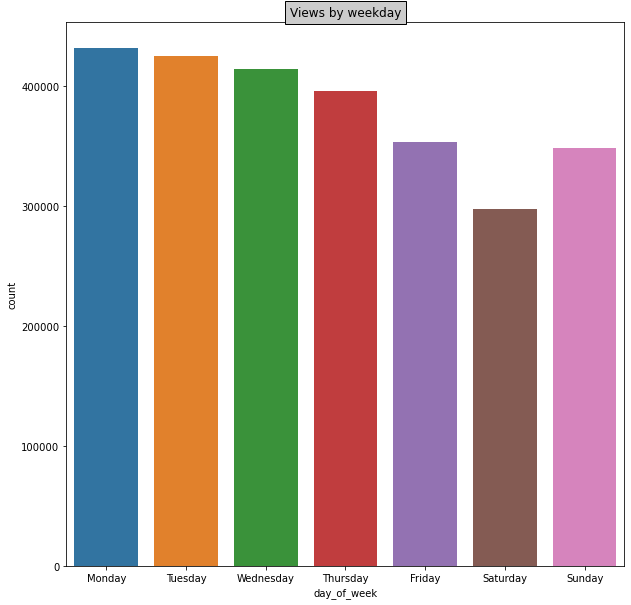

In [13]:
plt.figure(figsize = (10,10));
sns.countplot(x = df_events.day_of_week[df_events.event == "view"]);
plt.title("Views by weekday", bbox={'facecolor':'0.8', 'pad':5})

* on réalise un sampling aléatoire de 20.000 lignes avec et sans achat pour visualiser la tendance et représentation graphique (fichier trop volumineux sinon)

/Users/cedricboure/opt/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:405: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


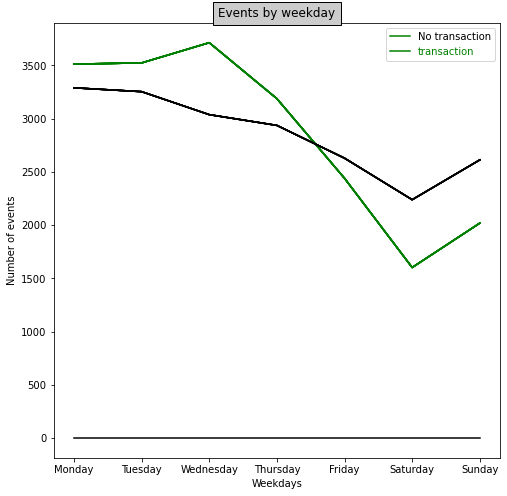

In [14]:
df_transac = df_events[df_events.events_transaction ==1].sample(n=20000)
df_Nottransac = df_events[df_events.events_transaction == 0].sample(n=20000)

plt.figure(figsize = (8,8));
plt.plot(df_transac.groupby('day_of_week').count(), color = "green")
plt.plot(df_Nottransac.groupby('day_of_week').count(), color = "black")
plt.legend(['No transaction','transaction'], labelcolor=['black','green'])
plt.title("Events by weekday", bbox={'facecolor':'0.8', 'pad':5})
plt.xlabel('Weekdays')
plt.ylabel('Number of events')
plt.show()

_On observe une confirmation de la tendance baissière pour la fin de semaine avec une légère hausse le dimanche. Transactions plus importantes en début de semaine (pic le mercredi)_
* On souhaite visualiser le trafic par heure (activité sur le site), pour cela on filtre par event = view, groupement par heure puis count() pour compter les modalités

Text(0, 0.5, 'Number of Views')

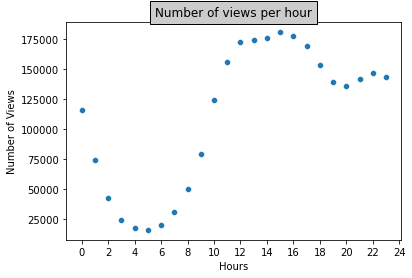

In [15]:
view_hour = df_events[df_events.event == "view"].groupby(df_events.timestamp.dt.hour).count()
x = view_hour.index
y = view_hour.timestamp

sns.scatterplot(x =x, y = y)
plt.locator_params(axis='x', nbins=22)

plt.title("Number of views per hour", bbox={'facecolor':'0.8', 'pad':5})
plt.xlabel("Hours")
plt.ylabel("Number of Views")

_On observe une tendance de trafic nocturne jusqu'à fin de matinée ave une baisse très marquée pour la deuxième partie de journée_
* On réalise une visualisation similaire mais en filtrant par event = transaction, groupement par heure puis count() pour compter les modalités

Text(0, 0.5, 'Number of transactions')

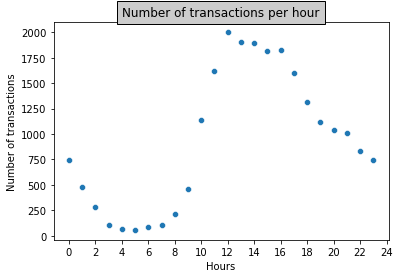

In [16]:
view_hour = df_events[df_events.event == "transaction"].groupby(df_events.timestamp.dt.hour).count()
x = view_hour.index
y = view_hour.timestamp

sns.scatterplot(x =x, y = y)
plt.locator_params(axis='x', nbins=22)

plt.title("Number of transactions per hour", bbox={'facecolor':'0.8', 'pad':5})
plt.xlabel("Hours")
plt.ylabel("Number of transactions")

_On observe une corrélation sur les transactions_

* On compare les événements ayant aboutis ou non à une transaction selon l'heure de la journée

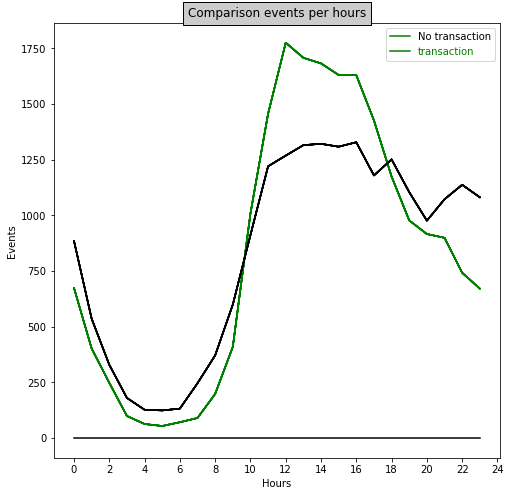

In [17]:
plt.figure(figsize = (8,8));
plt.plot(df_transac.groupby(df_transac.timestamp.dt.hour).count(), color = "green" );
plt.plot(df_Nottransac.groupby(df_Nottransac.timestamp.dt.hour).count(), color = "black" );
plt.legend(['No transaction','transaction'], labelcolor=['black','green']);
plt.locator_params(axis='x', nbins=22);
plt.title("Comparison events per hours", bbox={'facecolor':'0.8', 'pad':5})
plt.xlabel("Hours")
plt.ylabel("Events")
plt.show()

* On souhaite séparer le nombre d'événements pour visualiser le pourcentage de vues, de mises au panier et d'achats

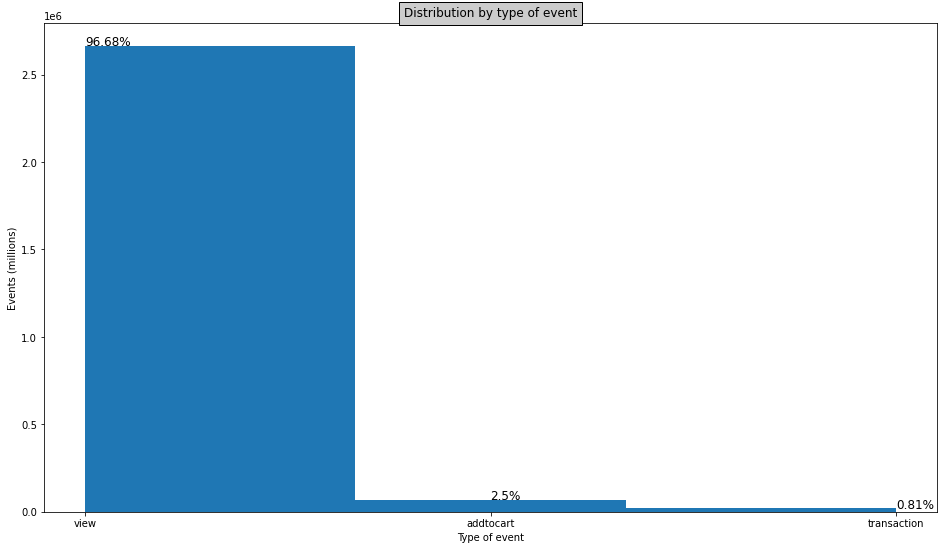

In [18]:
totalcases=df_events.shape[0]

fig, (ax1) = plt.subplots(1, figsize=(16,9))
ax1.hist(df_events['event'], bins=3)
ax1.set_xlabel("Type of event")
ax1.set_ylabel("Events (millions)")
ax1.set_title("Distribution by type of event", bbox={'facecolor':'0.8', 'pad':5})
for x, counts in zip(df_events['event'].unique().tolist(), df_events['event'].value_counts().tolist()):
    text=str(round((counts/totalcases)*100,2)) +'%'
    ax1.text(x, counts, text, fontsize=12)
plt.show()

* On resserre pour ne comparer que le nombre d'ajouts au panier et de transactions dans df_events

addtocart      68966
transaction    22457
Name: event, dtype: int64
67.60947325910114


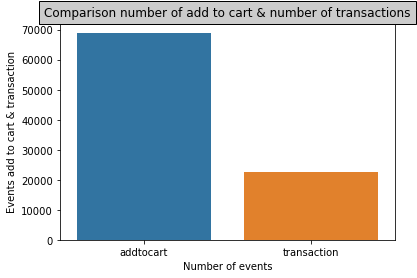

In [19]:
events_count = df_events["event"].value_counts()[1:]
plt.title("Comparison number of add to cart & number of transactions", bbox={'facecolor':'0.8', 'pad':5})
sns.barplot(x = events_count.index, y =  events_count.values);
print(events_count)
plt.xlabel("Number of events")
plt.ylabel("Events add to cart & transaction")
rapport_transactions = 100-((22457/69332)*100)
print(rapport_transactions)

_on constate un taux d'abandon du panier 67,6 % , c'est un taux très élevé_

* Pour identifier s'il y a des produits extrêmement populaires, on définie des bornes et on classe selon ce qu'on estime être des produit non consulté à très consulté. 

In [20]:
df_events['Product frequency'] = df_events['itemid'].map(df_events['itemid'].value_counts())
borne = [0,100, 1000, 1500, 2000]
label = ["Unpopular products","Popular products","Very popular products","Most popular products"]
df_events['Product category'] =  pd.cut(df_events['Product frequency'],borne, labels = label)
df_events.head()

,timestamp,visitorid,event,itemid,transactionid,day_of_week,events_addtocart,events_transaction,events_view,Product frequency,Product category
0,2015-06-02 00:02:12.117,257597,view,355908,NaN,Tuesday,0,0,1,57,Unpopular products
1,2015-06-02 00:50:14.164,992329,view,248676,NaN,Tuesday,0,0,1,34,Unpopular products
2,2015-06-02 00:13:19.827,111016,view,318965,NaN,Tuesday,0,0,1,15,Unpopular products
3,2015-06-02 00:12:35.914,483717,view,253185,NaN,Tuesday,0,0,1,14,Unpopular products
4,2015-06-02 00:02:17.106,951259,view,367447,NaN,Tuesday,0,0,1,260,Popular products


* On souhaite visualiser les valeurs extrêmes des produits

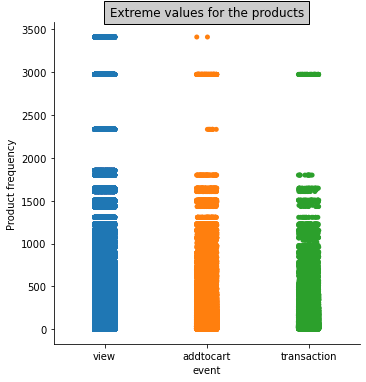

In [21]:
sns.catplot(x = 'event', y = 'Product frequency', data = df_events)
plt.title("Extreme values for the products", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

* Visualisation des 10 produits les plus populaires

<AxesSubplot:title={'center':'10 most popular products'}, xlabel='itemid', ylabel='count'>

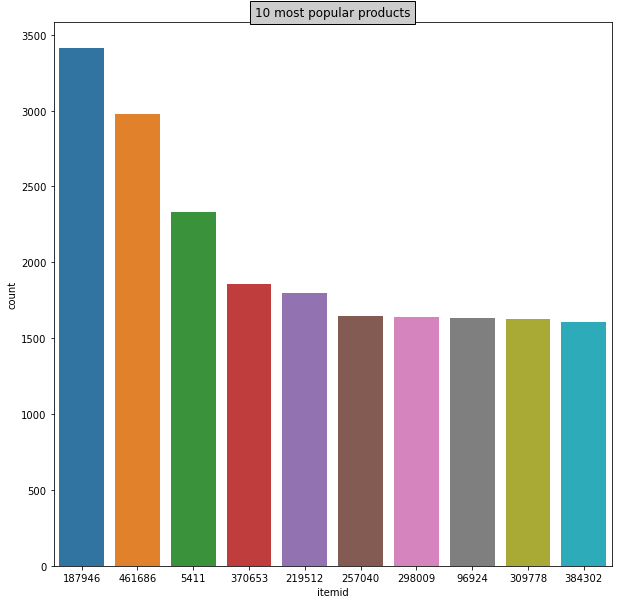

In [22]:
plt.figure(figsize = (10,10));
plt.title("10 most popular products", bbox={'facecolor':'0.8', 'pad':5})
sns.countplot(x='itemid',data=df_events,order=pd.value_counts(df_events['itemid']).iloc[:10].index, linewidth=2)

* Produits vus vs non-vus

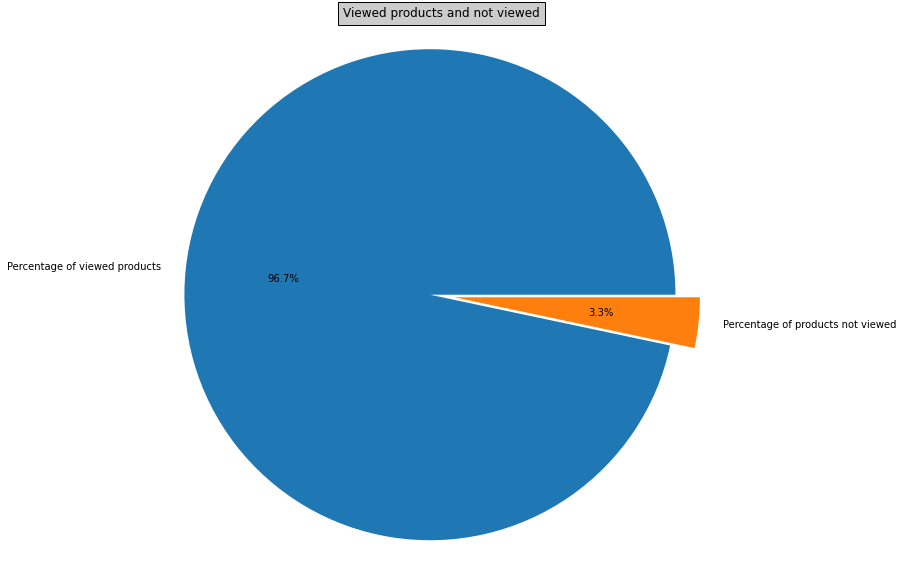

In [23]:
plt.figure(figsize = (10,10));

df = df_events['events_view'].value_counts()
my_labels = 'Percentage of viewed products','Percentage of products not viewed'
my_explode = (0, 0.1)
plt.pie(df,labels=my_labels, autopct='%1.1f%%', explode=my_explode)

plt.title("Viewed products and not viewed", bbox={'facecolor':'0.8', 'pad':5})
plt.axis('equal')
plt.show()

_96,7 % des produits ont été vus et seulement 3,3 % ne le sont pas_
* Nombre produits achetés vs non-achetés

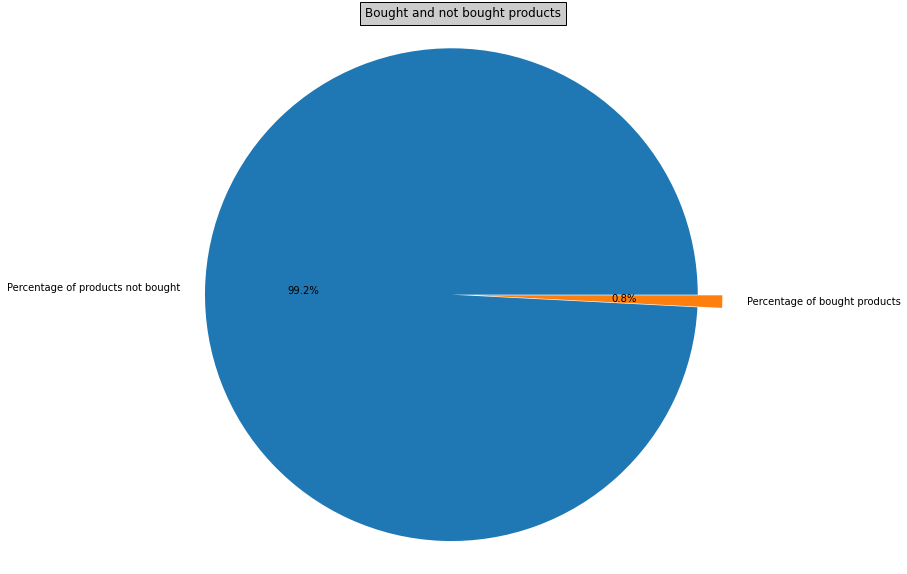

In [24]:
plt.figure(figsize = (10,10));

df = df_events['events_transaction'].value_counts()
my_labels = 'Percentage of products not bought','Percentage of bought products'
my_explode = (0, 0.1)
plt.pie(df,labels=my_labels, autopct='%1.1f%%', explode=my_explode)

plt.title("Bought and not bought products", bbox={'facecolor':'0.8', 'pad':5})
plt.axis('equal')
plt.show()

_99,2 % des produits ne sont pas achetés et seulement 0,8 % le sont, un taux de transformation très faible_
* Nombre produits ajoutés au panier vs non-ajoutés

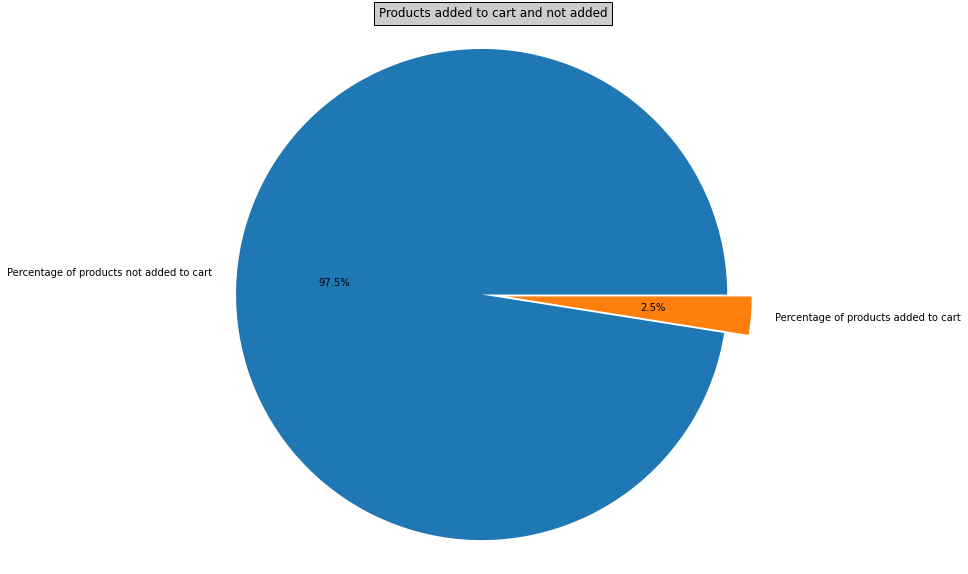

In [25]:
plt.figure(figsize = (10,10));

df = df_events['events_addtocart'].value_counts()
my_labels = 'Percentage of products not added to cart','Percentage of products added to cart'
my_explode = (0, 0.1)
plt.pie(df,labels=my_labels, autopct='%1.1f%%', explode=my_explode)

plt.title("Products added to cart and not added", bbox={'facecolor':'0.8', 'pad':5})
plt.axis('equal')
plt.show()

_97,5 % des produits ne sont pas ajoutés au panier et seulement 2,5 % le sont, score très faible_
* Équilibre des valeurs sur df_events visitorid  (calcul pour compléter le fichier rapport d'exploration)

In [26]:
df_events['visitorid'].value_counts().head(10)

1150086    7757
530559     4328
152963     3024
895999     2474
163561     2410
371606     2345
286616     2252
684514     2246
892013     2024
861299     1991
Name: visitorid, dtype: int64

_On observe un déséquilibre, le visitorid 1150086 est venu 7757 fois, le visitorid 530559 est venu 4328 fois, suspicion de bots_

* Problématique de visualisation : Certains utilisateurs semblent visiter le site de manière trop fréquente. Est-ce réellement le cas ?
* Pour identifier s'il y a des bots on définie des bornes arbitrairement et on classe selon ce qu'on estime être des fréquences d'utilisateurs faibles à excessives. Au-dessus de 3 000, on classe ces visitorid dans bots.

In [27]:
df_events['User frequency'] = df_events['visitorid'].map(df_events['visitorid'].value_counts())
borne = [0, 10, 50, 3000, 7757]
label = ["Infrequent user","Recurrent user","Big user","Bots"]
df_events["User category"] =  pd.cut(df_events['User frequency'],borne, labels = label)
df_events.head()

,timestamp,visitorid,event,itemid,transactionid,day_of_week,events_addtocart,events_transaction,events_view,Product frequency,Product category,User frequency,User category
0,2015-06-02 00:02:12.117,257597,view,355908,NaN,Tuesday,0,0,1,57,Unpopular products,2,Infrequent user
1,2015-06-02 00:50:14.164,992329,view,248676,NaN,Tuesday,0,0,1,34,Unpopular products,30,Recurrent user
2,2015-06-02 00:13:19.827,111016,view,318965,NaN,Tuesday,0,0,1,15,Unpopular products,2,Infrequent user
3,2015-06-02 00:12:35.914,483717,view,253185,NaN,Tuesday,0,0,1,14,Unpopular products,3,Infrequent user
4,2015-06-02 00:02:17.106,951259,view,367447,NaN,Tuesday,0,0,1,260,Popular products,1,Infrequent user


* Répartition du nombre d'achats par visiteur ainsi que les valeurs correspondantes :

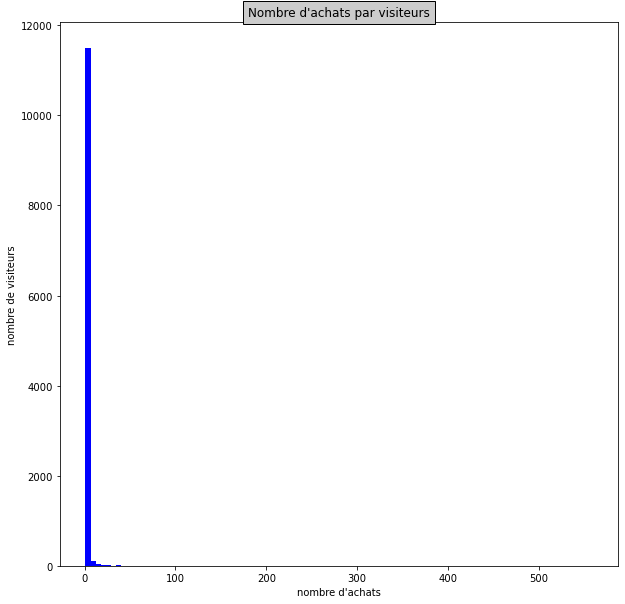

517951       1
387601       1
963194       1
627358       1
1135254      1
          ... 
861299     188
684514     189
530559     286
152963     349
1150086    559
Name: visitorid, Length: 11719, dtype: int64

In [28]:
df_transactions = df_events[df_events['event'] == 'transaction']

plt.figure(figsize=(10, 10))
plt.hist(df_transactions['visitorid'].value_counts(), bins=100, color='b')
plt.title("Nombre d'achats par visiteurs", bbox={'facecolor':'0.8', 'pad':5})
plt.xlabel('nombre d\'achats')
plt.ylabel('nombre de visiteurs')

plt.show()
df_transactions['visitorid'].value_counts().sort_values()

_Cela nous indique bien que le nombre d'achats par visiteur est anormalement élevé_

* Si on considère le visiteur qui 1150086 qui a fait 559 transactions sur la période :

In [29]:
559 / (df_events['timestamp'].max() - df_events['timestamp'].min()).days

4.08029197080292

_Le visiteur 1150086 aurait donc fait 4 achats en moyenne par jour ce qui semble très douteux_

* Visualisation de groupes d'utilisateurs avec des fréquences de visites très importantes

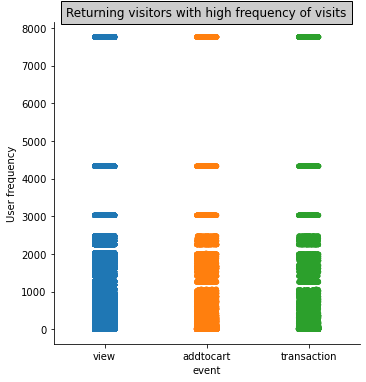

In [30]:
sns.catplot(x = 'event', y = 'User frequency', data = df_events)
plt.title("Returning visitors with high frequency of visits", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

* Pourcentage de personnes qui font moins de 100 achats (valeur arbitraire de test) :

In [31]:
(df_transactions['visitorid'].value_counts() < 100).mean()

0.9986346957931564

_99,8% des personnes font moins de 100 achats. On peut considérer que tout le reste sont des outliers._

* En conclusion de ce premier travail exploratoire, nous avons un grand nombre de lignes à analyser et peu de colonnes sur ce dataset. 
* Le taux d'abandon du panier est trop élevé (67,6%) et le taux de transformation global très faible (0,8%)
* On détecte la présence de bots par l'anormalité de la popularité d'items ayant déclenché un événement, il faut explorer le fichier différement pour comprendre ou exclure les hypothèses autres.
* La répartition des ventes dans la semaine est homogène avec une forte baisse le week-end
* Les valeurs sont peu corrélées entre-elles, celà est dû à des ID attribués aléatoirement et aux données modifiées sur le dataset.

In [32]:
#CEDRIC
#définir une visite comme étant l'ensemble des événements qui sont séparés de moins de 2h. Si supérieur à 2h, on ouvre une deuxième visite.
#avec 1 à 4
#Calculer la distance enre 2 événements, préfère travailler en timestamp pour ne pas faire de time delta, ajoure un ID pour ses lignes
#un ID visiteur qui renvoi vers une liste d'événement qui a un id et un timestamp